![ml1](./images/mln1.png)

![ml2](./images/mln2.png)

![ml3](./images/mln3.png)

![ml4](./images/mln4.png)

![ml5](./images/mln5.png)

![ml6](./images/mln6.png)

![ml7](./images/mln7.png)

![ml8](./images/mln8.png)

![ml9](./images/mln9.png)

![ml10](./images/mln10.png)

![ml11](./images/mln11.png)

![ml12](./images/mln12.png)

![ml13](./images/mln13.png)

![ml14](./images/mln14.png)

![ml15](./images/mln15.png)

![ml16](./images/mln16.png)

![ml17](./images/mln17.png)

![ml18](./images/mln18.png)

![ml19](./images/mln19.png)

![ml20](./images/mln20.png)

![ml21](./images/mln21.png)

![ml22](./images/mln22.png)

![ml23](./images/mln23.png)

![ml24](./images/mln24.png)

![ml25](./images/mln25.png)

![ml26](./images/mln26.png)

![ml27](./images/mln27.png)

![ml28](./images/mln28.png)

![ml29](./images/mln29.png)

![ml30](./images/mln30.png)

![ml31](./images/mln31.png)

![ml32](./images/mln32.png)

<div dir="rtl" markdown="1">
ما قصد داریم با استفاده از الگوریتم K-نزدیک‌ترین همسایه (KNN) گونه‌ی گل‌های Iris را بر اساس ویژگی‌های اندازه‌گیری شده (طول و عرض کاسبرگ و گلبرگ) تشخیص دهیم.

مسئله طبقه‌بندی (Classification): هدف، تخصیص یک برچسب (گونه‌ی گل) به هر نمونه است.

مورد استفاده: این روش پایه‌ای در یادگیری ماشین است که مفاهیم فاصله و تصمیم‌گیری ساده را آموزش می‌دهد

Classifying Iris Species

In [1]:
import pandas as pd
import numpy as np
import mglearn # dont forget install mglearn (pip install mglearn)

pandas برای مدیریت داده‌ها به‌صورت جدول

numpy برای محاسبات عددی

mglearn برای ابزارهای کمکی در مصورسازی

Meet the Data

In [13]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

<div dir="rtl" markdown="1">

   load_iris() داده‌ها را به صورت یک دیکشنری (نسخه‌ی Bunch) بازمی‌گرداند که شامل:

   data: آرایه‌ی ویژگی‌ها

   target: آرایه‌ی برچسب‌ها (عددی از 0 تا 2)

   target_names: اسامی گونه‌ها (setosa, versicolor, virginica)

   feature_names: اسامی ویژگی‌ها

   DESCR: توضیحات دقیق مجموعه داده، منبع و واحدهای اندازه‌گیری

In [14]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


<div dir="rtl" markdown="1">
کلیدها (keys) نشان می‌دهد چه اطلاعاتی در دسترس است.

In [15]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


<div dir="rtl" markdown="1">
DESCR حاوی جزئیات علمی درباره نحوه‌‌ی جمع‌آوری داده، تعداد نمونه‌ها (۱۵۰ گل)، و توزیع گونه‌ها (۵۰ نمونه از هر گونه).

In [16]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [17]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<div dir="rtl" markdown="1">

feature_names توضیح می‌دهد که هر ستون چه معنایی دارد:

   طول/عرض کاسبرگ (sepal)

   طول/عرض گلبرگ (petal)

In [18]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [19]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


<div dir="rtl" markdown="1">
اولین ۵ سطر به ما نشان می‌دهد که هر سطر یک نمونه و هر ستون یک ویژگی است.

In [20]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [21]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


<div dir="rtl" markdown="1">
شکل داده به ما می‌گوید متغیرها و نمونه‌ها چندتا هستند (۱۵۰×۴).

In [22]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<div dir="rtl" markdown="1">
بِین‌کانت (bin count) توزیع نمونه‌ها در سه کلاس را نشان می‌دهد و تضمین تعادل داده است.

Measuring Success: Training and Testing Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'],
    iris_dataset['target'],
    test_size=0.25,      
    stratify=iris_dataset['target'],  
    random_state=0
)

<div dir="rtl" markdown="1"> 

   test_size=0.25: می‌گوید ۲۵٪ داده برای ارزیابی مدل کنار گذاشته شود.

   stratify: تضمین می‌کند که درصد هر گونه در مجموعه‌ی آموزش و تست برابر باشد؛ جلوگیری از بایاس در داده‌های نامتعادل.

   random_state: برای تکرارپذیری، تقسیم‌بندی ثابت می‌ماند.

In [24]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [25]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


First Things First: Look at Your Data

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

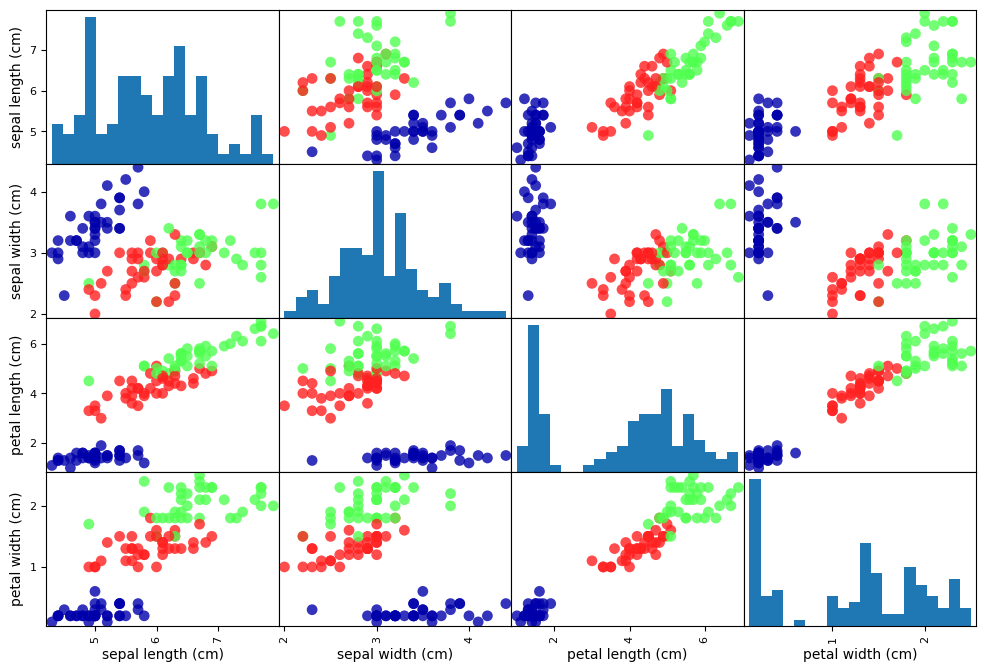

In [26]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(12, 8),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)


<div dir="rtl" markdown="1"> 


  ماتریس پراکنش (Scatter Matrix): برش‌های دوبه‌دو از ویژگی‌ها را نشان می‌دهد و به کمک رنگ می‌توان خوشه‌بندی‌‌های هر کلاس را دید.

   همبستگی غیررسمی: توزیع خطی یا جداشدگی واضح در برخی جفت ویژگی‌ها (مثلاً طول و عرض گلبرگ) به ما می‌گوید کدام ویژگی‌ها برای تفکیک کلاس‌ها مهم‌ترند.

   هیستوگرام روی قطر: توزیع هر ویژگی را به تفکیک کلاس نمایش می‌دهد و کمک می‌کند تفاوت میانگین/واریانس‌ها را مشاهده کنیم

![iris1](./images/Iris1.png)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<div dir="rtl" markdown="1"> 

   اصل کار KNN: برای هر نقطه آزمون، فاصله‌ی آن تا تمام نقاط آموزش (مثلاً فاصله اقلیدسی) محاسبه می‌شود. سپس k ناظر نزدیک‌ترین انتخاب شده و برچسب اکثریت در آن k همسایه، خروجی می‌شود.

   k=1: ساده‌ترین حالت؛ یک همسایه نزدیک‌ترین. مستعد نویز است اما پیاده‌سازی و تفسیر آن مشخص است.

   مزایا و معایب:

   مزیت: هیچ فرضیه‌ی آماری خاصی روی توزیع داده نمی‌گذارد.
    عیب: با افزایش ابعاد (درخت نفرین ابعاد) و داده‌های بزرگ، محاسبات کند می‌شود.

Making Predictions

In [19]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [20]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


<div dir="rtl" markdown="1"> 
    

   فرمت ورودی: باید آرایه‌ی دوبعدی با شکل (n_samples, n_features) باشد.

   تفسیر خروجی:

   prediction یک آرایه از اندیس کلاس‌ها است.

   تبدیل اندیس به نام کلاس (target_names) به درک نتایج کمک می‌کند.

   کاربرد: پس از آموزش مدل، می‌توان برای هر نمونه جدید با اندازه‌گیری ویژگی‌ها، گونه‌ی آن را پیش‌بینی کرد.

Evaluating the Model

In [21]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]



<div dir="rtl" markdown="1"> 

   دقت (Accuracy): نسبت تعداد نمونه‌های درست پیش‌بینی شده به کل نمونه‌ها.

   معیارهای دیگر (ماژول metrics):

   Precision, Recall, F1-score برای هر کلاس

   ماتریس اغتشاش (Confusion Matrix) 

In [22]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [23]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


![ml33](./images/mln33.png)

![ml34](./images/mln34.png)

![ml35](./images/mln35.png)

![ml36](./images/mln36.png)

![ml37](./images/mln37.png)

![ml38](./images/mln38.png)

![ml39](./images/mln39.png)

![ml40](./images/mln40.png)

![ml41](./images/mln41.png)

![ml42](./images/mln42.png)

![ml43](./images/mln43.png)

![ml44](./images/mln44.png)

![ml45](./images/mln45.png)

![ml46](./images/mln46.png)

![ml47](./images/mln47.png)

![ml56](./images/mln56.png)

![ml57](./images/mln57.png)

![ml58](./images/mln58.png)

![ml59](./images/mln59.png)

![ml60](./images/mln60.png)

![ml61](./images/mln61.png)

![ml62](./images/mln62.png)

![ml63](./images/mln63.png)

![ml48](./images/mln48.png)

![ml49](./images/mln49.png)

![ml50](./images/mln50.png)

![ml51](./images/mln51.png)

![ml52](./images/mln52.png)

![ml53](./images/mln53.png)

![ml54](./images/mln54.png)

![ml55](./images/mln55.png)

![end](./images/end.png)